In [2]:
#import library
import pandas as pd

In [3]:
#load data
df = pd.read_csv("prepForMLearning.csv", index_col = 0)

In [4]:
df0 = pd.read_csv("prepForMLearning.csv", index_col = 0)

In [5]:
df.head()

,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,gender,age
0,4,0,0.0,0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,1,39
1,2,0,0.0,0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,0,46
2,1,1,20.0,0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,1,48
3,3,1,30.0,0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,0,61
4,3,1,23.0,0,0,0,0,262.0,130.0,84.0,23.10,85.0,85.0,0,0,46


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   education        4240 non-null   int64  
 1   currentSmoker    4240 non-null   int64  
 2   cigsPerDay       4240 non-null   float64
 3   BPMeds           4240 non-null   int64  
 4   prevalentStroke  4240 non-null   int64  
 5   prevalentHyp     4240 non-null   int64  
 6   diabetes         4240 non-null   int64  
 7   totChol          4240 non-null   float64
 8   sysBP            4240 non-null   float64
 9   diaBP            4240 non-null   float64
 10  BMI              4240 non-null   float64
 11  heartRate        4240 non-null   float64
 12  glucose          4240 non-null   float64
 13  TenYearCHD       4240 non-null   int64  
 14  gender           4240 non-null   int64  
 15  age              4240 non-null   int64  
dtypes: float64(7), int64(9)
memory usage: 563.1 KB


In [8]:
df.describe(include = "all").T

,count,mean,std,min,25%,50%,75%,max
education,4240.0,1.955189,1.018522,1.00,1.0000,2.00,3.0000,4.0
currentSmoker,4240.0,0.494104,0.500024,0.00,0.0000,0.00,1.0000,1.0
cigsPerDay,4240.0,8.944340,11.904777,0.00,0.0000,0.00,20.0000,70.0
BPMeds,4240.0,0.029245,0.168513,0.00,0.0000,0.00,0.0000,1.0
prevalentStroke,4240.0,0.005896,0.076569,0.00,0.0000,0.00,0.0000,1.0
prevalentHyp,4240.0,0.310613,0.462799,0.00,0.0000,0.00,1.0000,1.0
diabetes,4240.0,0.025708,0.158280,0.00,0.0000,0.00,0.0000,1.0
totChol,4240.0,228.612259,31.122340,107.00,206.0000,234.00,262.0000,262.0
sysBP,4240.0,128.954599,15.389459,83.50,117.0000,128.00,144.0000,150.0
diaBP,4240.0,82.897759,11.910394,48.00,75.0000,82.00,90.0000,142.5


In [ ]:
#after converting to numbers. we are done with preprocessing. next is to split data into train and test

# Creating x-input and y-output

In [9]:
df.head()

,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,gender,age
0,4,0,0.0,0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,1,39
1,2,0,0.0,0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,0,46
2,1,1,20.0,0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,1,48
3,3,1,30.0,0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,0,61
4,3,1,23.0,0,0,0,0,262.0,130.0,84.0,23.10,85.0,85.0,0,0,46


In [15]:
X= df.drop(columns= ["TenYearCHD"], axis =0)
y= df.TenYearCHD

In [16]:
X.head()

,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,gender,age
0,4,0,0.0,0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,1,39
1,2,0,0.0,0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,46
2,1,1,20.0,0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,1,48
3,3,1,30.0,0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,0,61
4,3,1,23.0,0,0,0,0,262.0,130.0,84.0,23.10,85.0,85.0,0,46


In [12]:
y.head()

0    0
1    0
2    0
3    1
4    0
Name: TenYearCHD, dtype: int64

# splitting data into training and testing

In [13]:
from sklearn.model_selection import train_test_split

In [17]:
#train test split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=.20, random_state= 42)

In [18]:
#load random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [19]:
# Checking the shape of the `X_train`,`X_test`, `y_train` and `y_test`

print("X_train shape: ",X_train.shape)
print("X_test shape: ",X_test.shape)
print("y_train shape: ",y_train.shape)
print("y_test shape: ",y_test.shape)

X_train shape:  (3392, 15)
X_test shape:  (848, 15)
y_train shape:  (3392,)
y_test shape:  (848,)


# Training the machine model

In [20]:
#Random forest classifier
clf1= RandomForestClassifier()

In [21]:
#fit data into classifier
clf1.fit(X_train, y_train)

RandomForestClassifier()

# Model Evaluation

In [22]:
y_predict=clf1.predict(X_test)

In [25]:
print(y_predict)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [27]:
# Comparing model predicted values and actual values

print('array:',y_test[:25].to_list())
y_predict[:25]

array: [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
accuracy= accuracy_score(y_predict, y_test)

In [32]:
print(accuracy)

0.8561320754716981


<Axes: xlabel='TenYearCHD'>

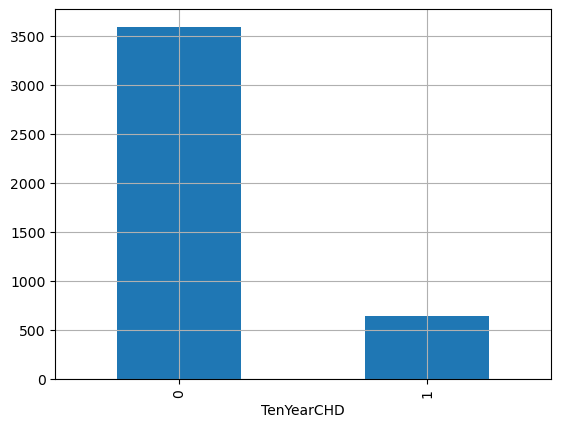

In [45]:
#this is done to know the number of people who might likely have CHD or not
df.TenYearCHD.value_counts().plot(kind= "bar", grid=True)

# Logistics Regression Model